In [2]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


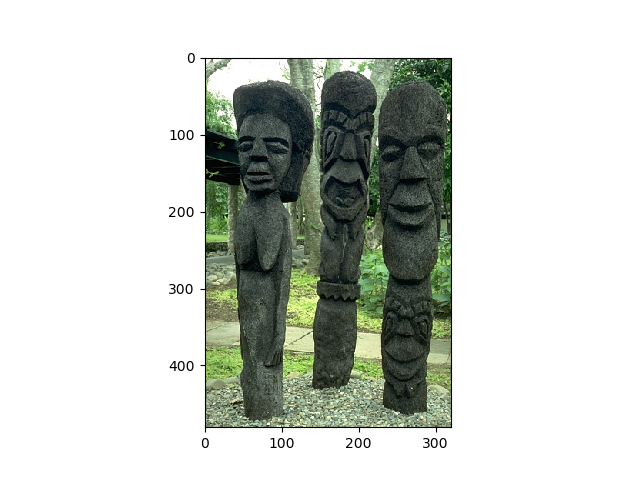

In [23]:
# Load an image
img = np.float32(imread('example.png'))/255.
plt.imshow(img)

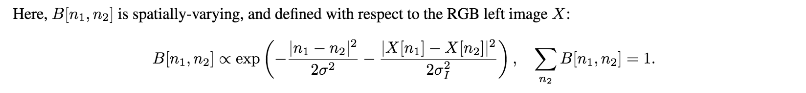

In [24]:
# This is the bilateral filtering code from pset1
# Note that here the filering is applied on the RGB image
def bfilt(X,K,sgm_s,sgm_i):
    H = X.shape[0]; W = X.shape[1]

    yy = np.zeros(X.shape)
    B = np.zeros([H,W,1])

    
    for y in range(-K,K+1):
        for x in range(-K,K+1):
            if y < 0:
                y1a = 0; y1b = -y; y2a = H+y; y2b = H
            else:
                y1a = y; y1b = 0; y2a = H; y2b = H-y

            if x < 0:
                x1a = 0; x1b = -x; x2a = W+x; x2b = W
            else:
                x1a = x; x1b = 0; x2a = W; x2b = W-x
                

            bxy = X[y1a:y2a,x1a:x2a,:] - X[y1b:y2b,x1b:x2b,:]
            bxy = np.sum(bxy*bxy,axis=2,keepdims=True)

            bxy = bxy/(sgm_i**2) + np.float32( y**2 + x**2)/(sgm_s**2)
            bxy = np.exp(-bxy/2.0)

            B[y1b:y2b,x1b:x2b,:] = B[y1b:y2b,x1b:x2b,:]+bxy
            yy[y1b:y2b,x1b:x2b,:] = yy[y1b:y2b,x1b:x2b,:]+bxy*X[y1a:y2a,x1a:x2a,:]
    return yy/B

<IPython.core.display.Javascript object>


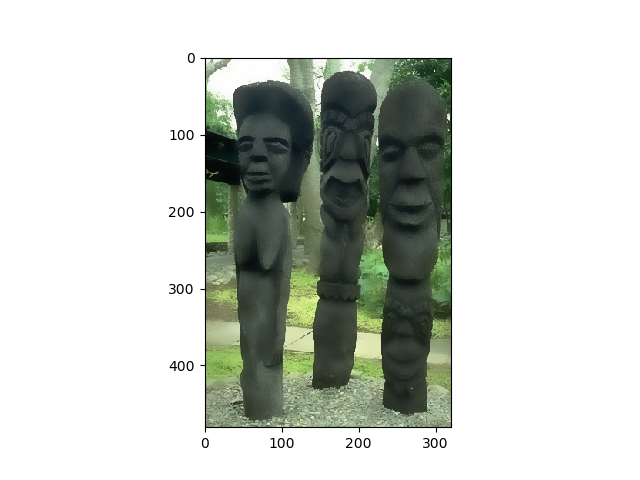

In [26]:
out = bfilt(img, 20, 5, 0.25)
plt.imshow(out)